# **Density Estimation Methods**

In [ ]:
import numpy as nu
import pandas as pa
import matplotlib.pyplot as plt

## ***1.Parametric Method :***
#### Here we make an assumption that the data follows known distributions like normal distribution, log-normal or any other.

#### And we estimate the parameters required to plot the data. if we assume normal distribution, we will estimate μ of population from the sample data and similarly S.D and we fit it into pdf of normal distribution

In [ ]:
sample = nu.random.normal(loc=50, scale=5, size=1000)

In [ ]:
sample

array([46.25492857, 52.97929457, 59.73144298, 55.44932379, 48.91649143,
       46.83655677, 46.9627049 , 55.06244864, 57.67013649, 60.75106426,
       55.38021622, 39.28115774, 45.12183575, 52.77584295, 58.64193836,
       54.83114394, 48.82011153, 47.58818488, 44.85119468, 52.21188147,
       49.3039084 , 50.47408087, 46.29277816, 60.83242752, 49.44966782,
       50.23703515, 58.73982368, 57.83015977, 57.52906276, 51.03961685,
       49.40827835, 50.0466822 , 50.37007007, 52.14306077, 56.34587535,
       53.54591854, 47.51703529, 48.57587796, 49.29992519, 41.61257453,
       58.57744994, 48.65562722, 48.64714677, 59.58033299, 45.3200764 ,
       54.6524069 , 49.60381983, 50.62773408, 44.33593431, 54.37837026,
       52.06697022, 51.5925802 , 50.91967142, 49.64106924, 50.90335233,
       47.59008859, 52.83748038, 48.97721783, 47.51728392, 57.73262613,
       51.51539188, 51.52565665, 46.74781715, 48.34179864, 53.45857275,
       50.95222761, 53.52034457, 39.97921442, 48.31079936, 52.65

In [ ]:
sample.mean()    # This parameter is used

50.36207487143555

(array([  7.,  15.,  36., 138., 205., 258., 188., 108.,  37.,   8.]),
 array([33.09640644, 36.31449134, 39.53257624, 42.75066114, 45.96874603,
        49.18683093, 52.40491583, 55.62300073, 58.84108563, 62.05917052,
        65.27725542]),
 <BarContainer object of 10 artists>)

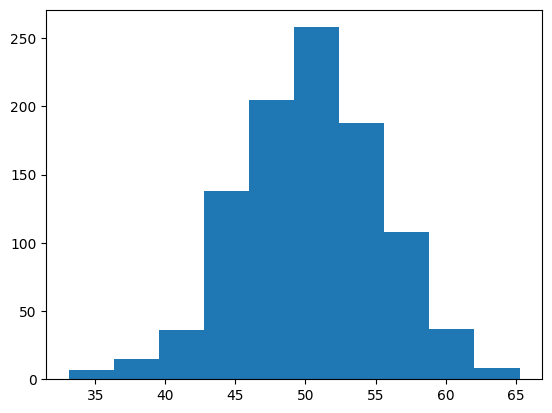

In [ ]:
plt.hist(sample, bins=10)

In [ ]:
sample_mean = sample.mean()
sample_std = sample.std()

In [ ]:
from scipy import stats
dist = stats.norm(sample_mean, sample_std)

In [ ]:
val= nu.linspace(sample.min(),sample.max(), 100)
dens = dist.pdf(val)

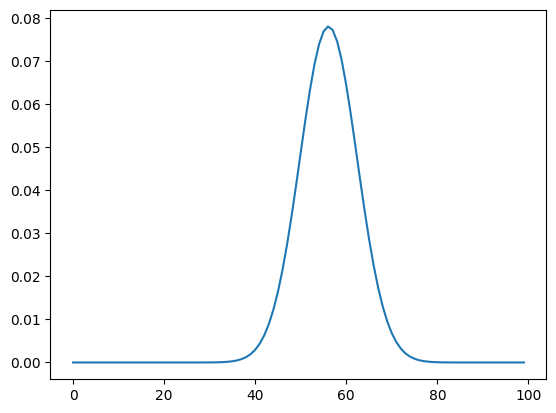

In [ ]:
plt.plot(dens)

## ***2.Non-Parametric Method :***

#### Here we dont make any assumption, we use every data point available to us to form the pdf.

#### The technique is called **KDE** Kernel Density Estimation.
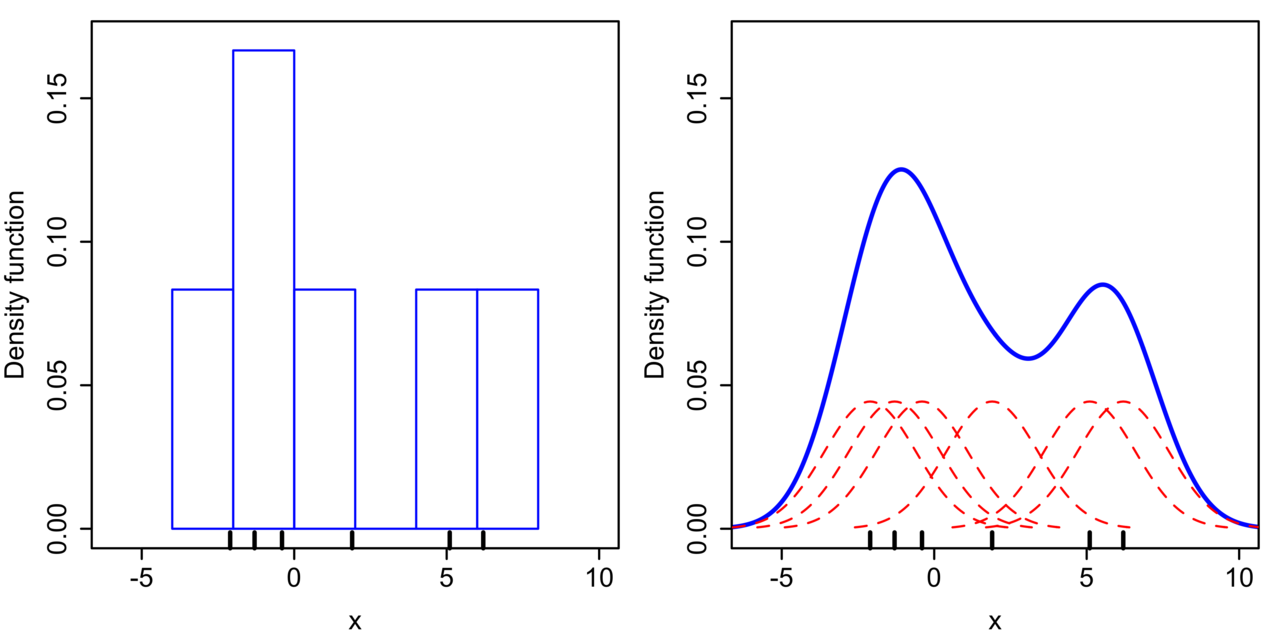
#### A kernel (Orange dotted distribution) is plotted. Center of each one is each data point. Now the Blue line value at a point is Sum of all the values of orange line at tha y value.

#### Generally the orange line will be Gaussian and its SD is called Hyper Parameter. Varying this will vary the smothness of the blue line or the Pdf Obtained.

In [ ]:
sample1 = nu.random.normal(25,5,300)
sample2 = nu.random.normal(50,10,700)
sample = nu.hstack((sample1,sample2))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  3.,  1.,
         6.,  5.,  4., 10.,  8., 16., 13., 11., 14., 17., 10., 17., 25.,
        19., 18., 16., 22., 19., 14., 17., 13.,  9., 20.,  9., 13.,  9.,
         6., 10., 12., 11., 17., 15., 12., 18., 22., 14., 17., 24., 20.,
        21., 28., 24., 18., 24., 25., 18., 20., 24., 13., 20., 20., 19.,
        21., 16., 14., 15., 14.,  9.,  8., 10.,  6.,  9.,  6.,  4.,  8.,
         4.,  4.,  4.,  0.,  1.,  1.,  4.,  1.,  2.,  0.,  1.,  1.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 4.73679537,  5.54203338,  6.34727139,  7.1525094 ,  7.95774741,
         8.76298543,  9.56822344, 10.37346145, 11.17869946, 11.98393747,
        12.78917548, 13.59441349, 14.3996515 , 15.20488951, 16.01012752,
        16.81536553, 17.62060354, 18.42584155, 19.23107956, 20.03631757,
        20.84155558, 21.64679359, 22.4520316 , 23.25726962, 24.06250763,
        24.86774564, 25.67298365, 26.47822166, 27.28345967, 28.088697

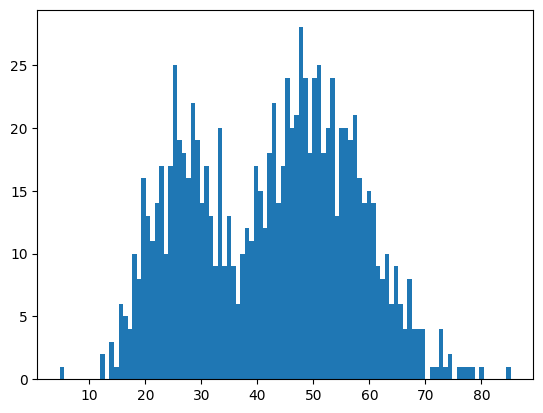

In [ ]:
plt.hist(sample, bins=100)

In [ ]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=3, kernel='gaussian')

In [ ]:
density = model.fit(sample.reshape(1000,1))

In [ ]:
density

KernelDensity(bandwidth=3)

In [ ]:
val = nu.linspace(sample.min(),sample.max(),100)
density_log = density.score_samples(val.reshape(100,1))

In [ ]:
pdfvalues = nu.exp(density_log)

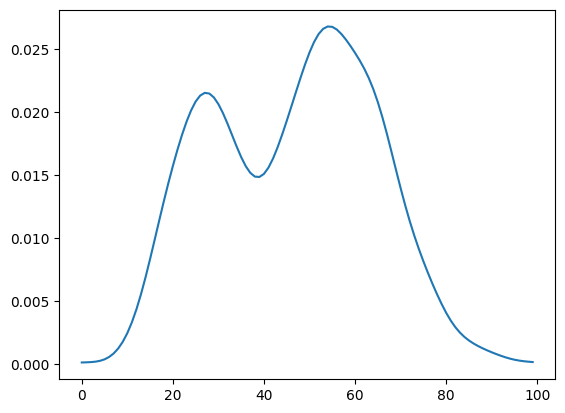

In [ ]:
plt.plot(pdfvalues)